# Матричные разложения и уменьшение размерности

## Метод главных компонент
Мы видим мир трехмерным, экран компьютера двумерный, но многие задачи требуют работы с данными большой размерности, поэтому просто посмотреть на них не получится. Выход - рисовать *проекцию* данных. Наверное, вы делали такое на уроках изобразительного искусства или черчении, когда для трехмерного объекта надо построить его проекцию. Для одного и того же объекта можно нарисовать много разных проекций. Представьте себе палку, посмотрим на нее с торца - увидим кружочек, а посмотрим сбоку - увидим длинную полосу. Каждая из этих проекций несет в себе некоторую информацию об объекте, но разную. По какой из этих проекций проще опознать палку, торцевой или боковой?

Также и с данными, строя разные проекции данных мы можем вообще ничего не понять в них, а может повезти и мы найдем такую проекцию, в которой все будет понятно.

Почему палку проще опознать с боковой проекции, чем с торцевой? Да потому что она больше, больше частей палки мы видим. А давайте строить такие проекции данных, чтобы их разброс в проекции был как можно больше!

Но что есть проекция? Это перевод из одного пространства в другое, для примера с палкой - из трехмерного в двумерное. В любом пространстве мы можем выделить координатные оси, с помощью которых и задаются координаты всех точек в этом пространстве. Давайте будем искать такие координатные оси, чтобы разброс данных в проекции на них был как можно больше. Наверное, в таких осях мы лучше увидим наши данные.

Координатная ось это вектор, точки в пространстве определяются векторами, а изменять вектора, поворачивать или масштабировать их мы можем с помощью матричных операций. Тогда и задачу поиска подходящих осей мы можем решить с помощью операций с матрицами.

Оси должны быть ортогональны (перпендикулярны), будем строить их последовательно. Сначала построим первую ось, такую, для которой разброс данных в проекции на нее будет максимальным, потом построим вторую ось, перпендикулярную первой и разброс данных в проекции на которую также максимальный, потом третью, перпендикулярную первым двум с максимальным разбросом проекций данных и т.д. Такие оси называют *главными компонентами*, а метод, который их вычисляет - *метод главных компонент* (PCA, Principal Component Analysis). Для двумерного случая можно нарисовать, картинка ниже. Заметьте, для какого положения оси разброс значения проекций данных на нее будет (красные точки) максимальным, это и будет первая главная компонента (розовая линия), вторая главная компонента всегда перпендикулярна первой и не нарисована.

![img](https://drive.google.com/uc?id=1AUr4BIXwy9EWgXvou6b6Dqhd3WLLZ-dN)

Поиграть онлайн можно на сайте https://setosa.io/ev/principal-component-analysis/ - расставляйте точки и смотрите какие получаются главные компоненты (оси).

Конечно, все что мы описали словами можно перевести в математический вид и применять для пространств любой размерности. Окажется, что главные компоненты это есть [*собственные вектора*](https://ru.wikipedia.org/wiki/Собственный_вектор) [*матрицы ковариации*](https://ru.wikipedia.org/wiki/Ковариационная_матрица) наших исходных данных, отсортированные по убыванию *собственного значения*. Мы не будем вникать в математическую формулировку этой матрицы, но можем ее посчитать с помощью метода `cov` библиотеки `numpy`, а собственные вектора найти с помощью `linalg.eig` той же библиотеки.    

## Самостоятельный расчет главных компонент
Давайте сгенерируем данные, найдем их среднее, найдем матрицу ковариации для них (ковариация считается для отклонения от среднего значения), найдем собственные вектора этой матрицы, отсортируем их по убыванию собственного значения, оставим только первый из них (самая главная компонента), и восстановим по этой компоненте исходные данные, отбросив все остальные компоненты.  

In [2]:
import numpy as np

# двумерные данные
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

# находим среднее и центирируем (вычитаем среднее)
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())

print("Mean vector: ", m)

# матрица ковариации, считается для центрированных данных
covmat = np.cov(Xcentered)
print("Covariance marix: \n", covmat, "\n")
print("Variance of X: ", covmat[0,0])
print("Variance of Y: ", covmat[1,1])
print("Covariance X and Y: ", covmat[0,1])

# считаем собственные вектора и собственные числа этой матрицы
num, vecs = np.linalg.eig(covmat)

ind=np.argsort(-num) # сортируем в порядке убывания собственных чисел
# numpy сортирует по возрастанию, изменим знак - будет по убыванию
vecs=vecs[:,ind] # отсортированные собственные вектора
num=num[ind] # отсортированные собственные числа
print("Eigen numbers",num)
print("Eigen vectors \n",vecs)
v = vecs[:,0] # самая главная компонента, изменяйте индекс для других компонент
# проекция на нее наших данных = координаты по этой оси
Xproj = np.dot(v,Xcentered)

n = 9     #номер примера данных
# восстанавливаем его, берем эту компоненту с множителем равным координате на проекции, добавляем среднее
Xrestored = Xproj[n]*v + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Mean vector:  (5.5, 11.47128946958308)
Covariance marix: 
 [[ 9.16666667 18.42108244]
 [18.42108244 39.67830208]] 

Variance of X:  9.166666666666666
Variance of Y:  39.67830207821672
Covariance X and Y:  18.42108244338248
Eigen numbers [48.34059994  0.50436881]
Eigen vectors 
 [[-0.42553774 -0.90494068]
 [-0.90494068  0.42553774]]
Restored:  [10.03020202 21.10513331]
Original:  [10.         21.11933546]


Обратите внимание, что мы довольно точно восстановили из проекции - одного числа Xproj[n] - исходный двумерный вектор.
### decomposition.PCA
В библиотеке `sklearn` такой метод, наряду с другими похожими, реализован в модуле [`decomposition`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

Для [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
указываем число главных компонент  в аргументе `n_components`, имеет важные атрибуты:
* `components_` - сами найденные главные компоненты
* `explained_variance_ratio_` - процент от величины разброса данных, который "объясняется" (соответствует) компонентой.
* и другие,

Реализованы методы:
* `fit()` - вычисление главных компонент
* `fit_transform()` - вычисление главных компонент и перевод данных в них (проекция).
* `transform()` - проекция данных в главные компоненты
* `inverse_transform()` - обратная проекция из главных компонент в пространство данных.
* `get_covariance()` - расчет ковариации
* и другие

Давайте предыдущий пример реализуем в этой библиотеке.
Можно заметить, что результаты совпадают с точностью до знака. Это объясняется тем, что от знака зависит только направление оси (компоненты), которое можно выбрать произвольно.

In [3]:
#
from sklearn.decomposition import PCA # подключаем модуль
pca = PCA(n_components = 1) # создаем объект PCA с одной главной компонентой
XPCAreduced = pca.fit_transform(np.transpose(X)) # считаем ее и сразу строим проекцию
# первое измерение в аргументе это примеры, у нас было наоборот, поэтому транспонируем Х.

print('Our reduced X: \n', Xproj) # проекция посчитанная в ручную
print('Sklearn reduced X: \n', XPCAreduced) # проекция посчитанная PCA

print('Mean vector: ', pca.mean_, m) # среднее
print('Projection: ', pca.components_, v) # главные компоненты
print('Explained variance ratio: ', pca.explained_variance_ratio_) # процент разброса соответствующий этой компоненте

Our reduced X: 
 [  8.32607582   8.11009098   4.85357363   5.39867896   3.34408641
  -1.37335168  -3.15651413  -7.9464263   -6.91038457 -10.64582911]
Sklearn reduced X: 
 [[-8.32607582]
 [-8.11009098]
 [-4.85357363]
 [-5.39867896]
 [-3.34408641]
 [ 1.37335168]
 [ 3.15651413]
 [ 7.9464263 ]
 [ 6.91038457]
 [10.64582911]]
Mean vector:  [ 5.5        11.47128947] (5.5, 11.47128946958308)
Projection:  [[0.42553774 0.90494068]] [-0.42553774 -0.90494068]
Explained variance ratio:  [0.98967409]


### Применение для классификации

Сам по себе метод главных компонент только переводит данные в другое пространство, но его можно использовать для решения задач. Например, для визуализации, переводя многомерные данные в двумерное пространство можем их нарисовать более понятно.

Для классификации этот метод тоже может быть полезен, если перевести данные в пространство главных компонент, то может получиться так, что они будут лучше разделяться классификатором.

Попробуем пример с ирисами решить с и без главных компонент простым классификатором.

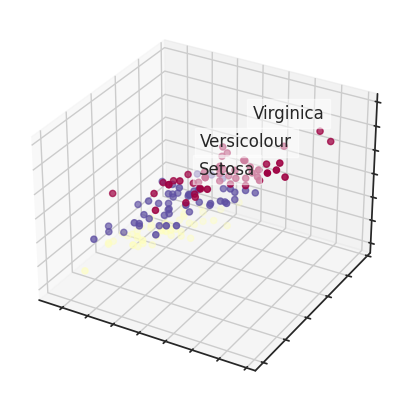

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')

from sklearn import decomposition # подключим модуль
from sklearn import datasets
from mpl_toolkits import mplot3d

# Загрузим данные об ирисах
iris = datasets.load_iris()
X = iris.data # Признаки
y = iris.target # Классы

# Красивая трёхмерная картинка
fig = plt.figure(1, figsize=(6, 5))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = plt.axes(projection='3d')
#plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype('float64')
ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=y_clr, cmap=plt.cm.Spectral)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.show()

Классифицируем данные неглубоким деревом, которое в данном случае плохо справится с классификацией из-за того, что у неё не хватит возможностей для описания данных

In [5]:
from sklearn.tree import DecisionTreeClassifier # дерево
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# разделим данные на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

# Возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


Теперь попробуем сделать то же самое, но с данными, для которых мы снизим размерность до двумерных с помощью PCA:

In [6]:
#  создадим PCA с двумя главными компонентами
pca = decomposition.PCA(n_components=1)
X_centered = X - X.mean(axis=0) # отцентруем данные
pca.fit(X_centered) # обучим PCA
X_pca = pca.transform(X_centered) # и найдем проекции данных на главные компоненты

# Нарисуем получившиеся проекции в новом двумерном пространстве
# plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
# plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
# plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
# plt.legend(loc=0);

In [7]:
# Повторим классификацию, но теперь на этих двумерных проекциях
# разделим на обучающую и проверочную выборки, random_state тот же, поэтому разделение будет таким же как раньше.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)
# создаем классификатор той же архитектуры
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
# обучаем его, но теперь на двумерных проекциях данных
clf.fit(X_train, y_train)
# проверяем
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


Классификация стала лучше! Еще и быстрее, потому что мы работаем теперь с двумерными данными.

Посмотрим на 2 главные компоненты в последнем PCA-представлении данных и на тот процент исходной дисперсии в данных, который они "объясняют".

In [8]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))


1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)


### Пример с рукописными цифрами из MNIST

Посмотрим другой пример с изображениями рукописных цифр из набора данных MNIST.  Цифры состоят из 64 пикселей, а в 64-мерном пространстве нарисовать сложновато...
Но с помощью PCA можем снизить размерность всего до 2, нарисовать и увидеть, что даже на глаз рукописные цифры неплохо разделяются на отдельные группы (кроме 8-ки и 5-ки, которые все портят).


Projecting 64-dimensional data to 2D


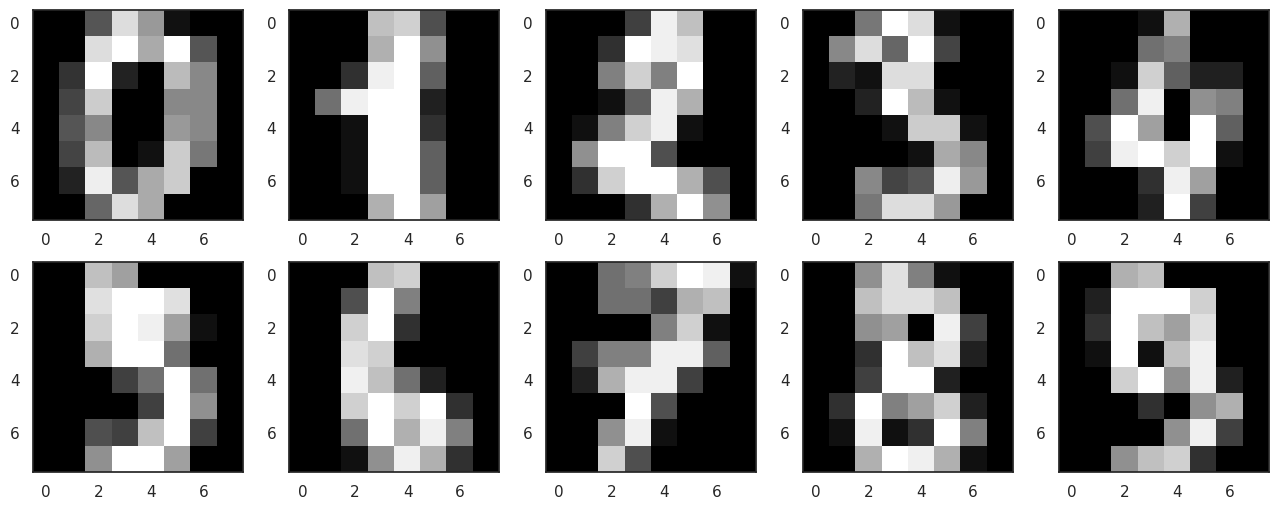

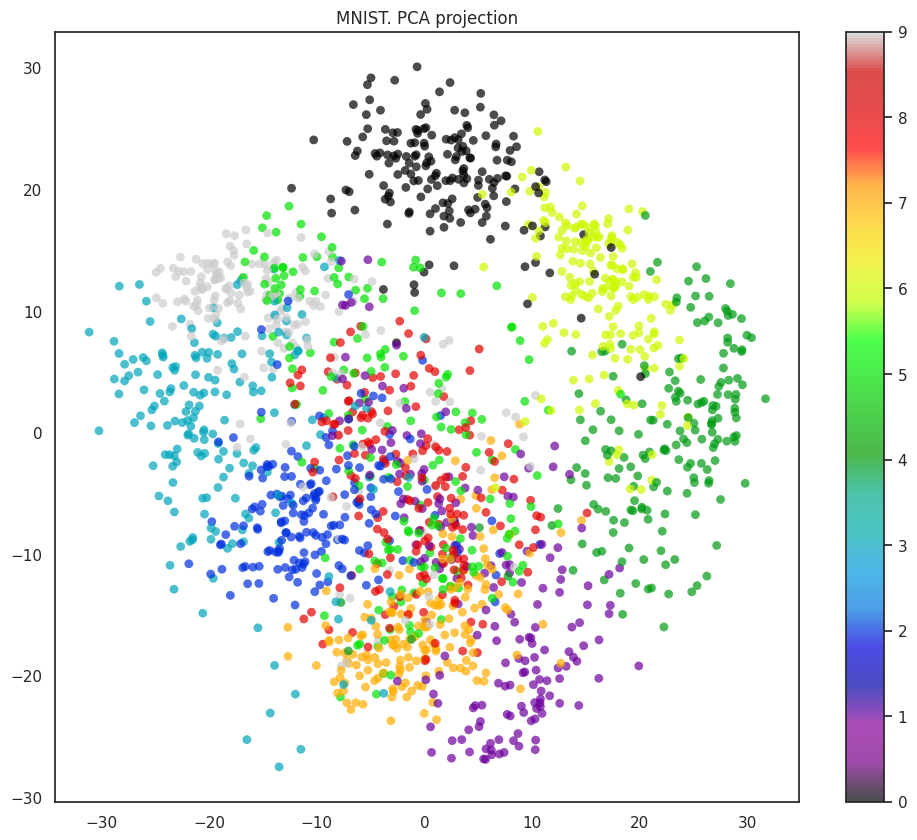

In [9]:
digits = datasets.load_digits() # загрузим данные
X = digits.data # изображения цифр
y = digits.target # классы - названия цифр

# нарисуем несколько примеров цифр
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

# посчитаем две главные компоненты и переведем данные в двумерное пространство
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X) #

print('Projecting %d-dimensional data to 2D' % X.shape[1])

# нарисуем примеры в этом двумерном пространстве точками, цвет которых отвечает за цифру
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.colorbar() # нарисуем легенду, чтобы знать какой цвет отвечает за цифру
plt.title('MNIST. PCA projection')
plt.show()

На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. В нашем примере для этого достаточно выделить 21 главную компоненту, то есть снизить размерность с 64 признаков до 21.



90% variance at component №  21


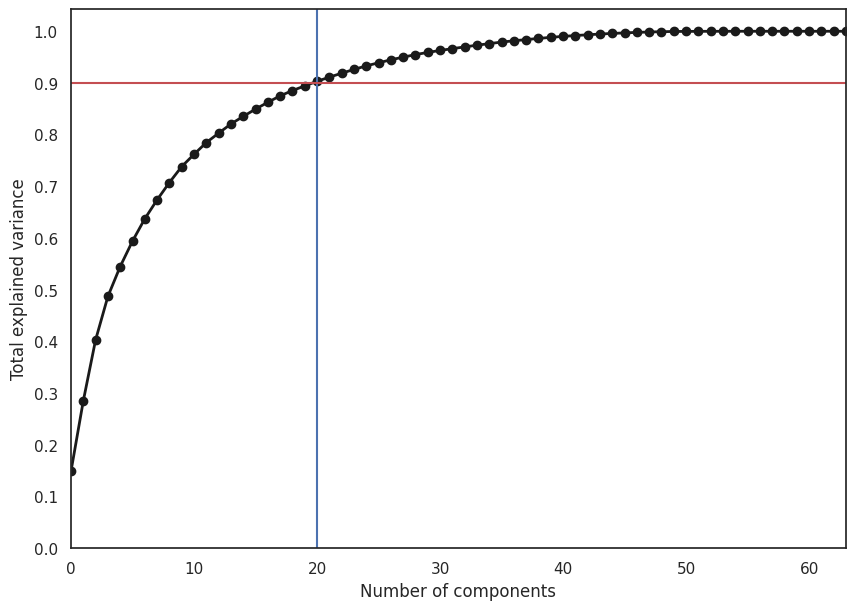

In [10]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
# будем рисовать процент "объясненной" дисперсии добавляя новые компоненты
evr=np.cumsum(pca.explained_variance_ratio_)
plt.plot(evr, color='k', lw=2, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

cmp=np.where(evr>0.9)[0][0] # здесь набeрется 90%
print('90% variance at component № ', cmp+1)

plt.axvline(cmp, c='b')
plt.axhline(0.9, c='r')
plt.show();

### Метод T-SNE
Для сравнения, не вдаваясь в детали, посмотрим на другой метод, t-SNE, который более сложный, чем PCA, но также реализован в sklearn.  PCA находит только линейные комбинации исходных признаков, этот же может находить нелинейные, поэтому он дает лучшие результаты, но гораздо дольше и сложнее.

Смысл метода заключается в том, что

- 1) сначала на основе данных для каждой точки считаются условные вероятности того, что она, при случайном выборе с Гауссовым распределением, окажется соседней для заданной точки данных,
- 2) а затем в пространстве меньшей размерности подбираются такие точки, для которых условные вероятности оказаться соседними как можно ближе к посчитанным на первом шаге

Сложные [формулы](https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/)  [ [тык](https://habr.com/ru/post/267041/) ] мы опустим, но отметим, что, в отличие от PCA, этот метод работает только с теми точками, на которых и обучается, и не может дать результата для новых примеров. С другой стороны, t-SNE выполняет нелинейное преобразование координат, в отличии от PCA, который выполняет линейные преобразования, а значит может давать лучшие результаты. Поиграть можно [здесь](https://projector.tensorflow.org/)

Реализован в модуле [`manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE) и, в силу сказанного выше, не имеет метода `transform()` для новых данных

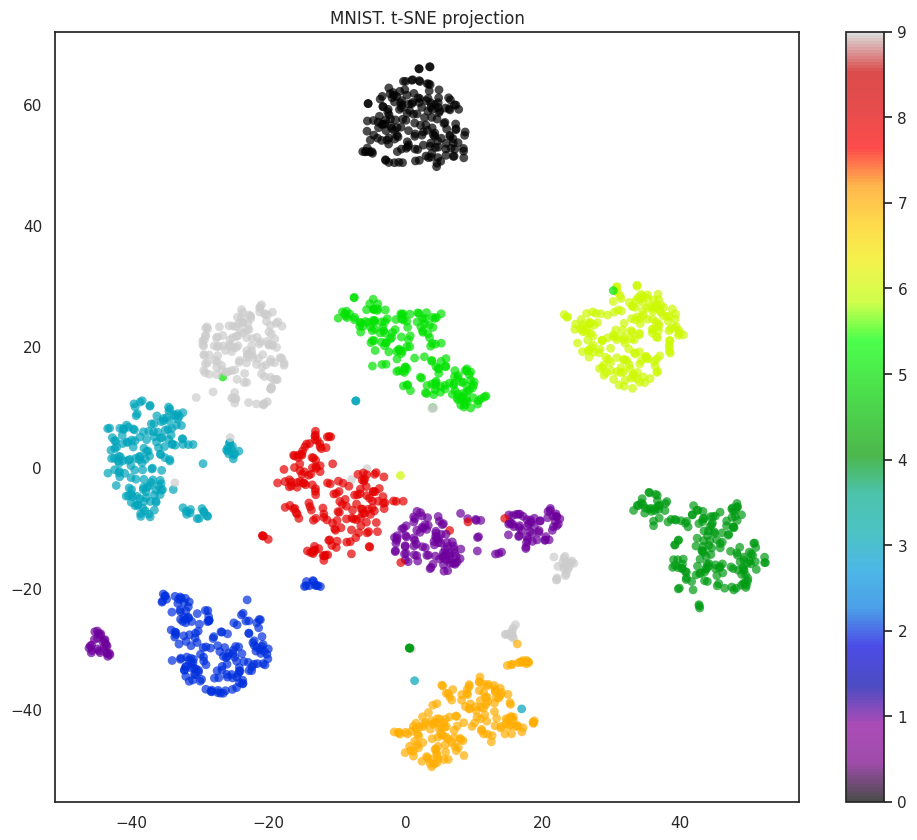

CPU times: user 24.5 s, sys: 212 ms, total: 24.7 s
Wall time: 14.6 s


In [11]:
%%time

from sklearn.manifold import TSNE # здесь подключаем метод TSNE
tsne = TSNE(n_components=2, random_state=17) # создаем модель TSNE, по умолчанию 2 компоненты

X_tsne = tsne.fit_transform(X) # обучаем ее и строим проекцию данных на компоненты

# рисуем
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.colormaps.get_cmap('nipy_spectral'))
plt.colorbar()
plt.title('MNIST. t-SNE projection')
plt.show()

#  Анализ независимых компонент

В PCA мы ставили условие, что проекция данных на ось-компоненту должна иметь максимальный разброс (дисперсию), а сами компоненты ортогональны. Но это не единственный вариант, мы можем поставить другое условие и искать другие компоненты.

В методе *анализа независимых компонент* (ICA, Independent Component Analysis) нет требования, чтобы компоненты были ортогональны. Ставится условие, чтобы они были как можно более "независимы". "Независимость" можно сформулировать математически, и опять искать такие компоненты, которые подходят под условие.
Мы не будем вникать в математические формулы, а посмотрим на сравнение PCA и ICA, рисунок ниже.

![img](https://drive.google.com/uc?id=1KF01RElgDO7xBT_W_Wn-o4wGO7_0RMjF)

 Видим различие этих методов.

 ICA хорошо подходит для разделения линейной смеси сигналов, например звуковых. Реализован в функции [`FastICA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html), которой можно указать аргументы
 * `n_components` - число компонент
 * `max_iter` - максимальное число итераций для поиска компонент
 * `tol` - минимальная точность компонент

 и другие

 Обладает атрибутами
 * `components_` - найденные компоненты
 * `mixing_` - обратные преобразования компонент в пространство данных
 * `mean_` - среднее значение данных
 * `n_iter_` - число итераций
 * и др.

 и методами как у `PCA`.

В примере сделаем смесь трех сигналов, и попробуем компоненты этой смеси восстановить обратно.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


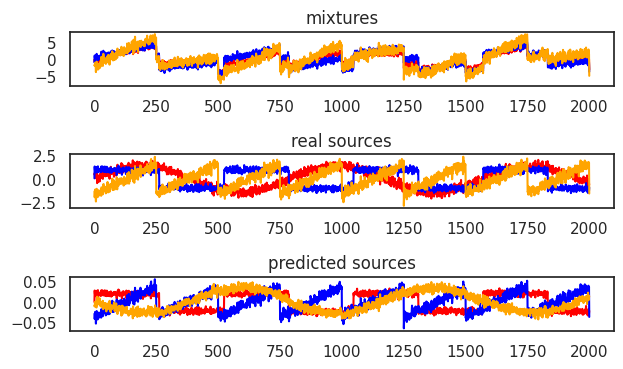

In [12]:
import numpy as np
from scipy import signal # для работы с сигналами
from matplotlib import pyplot as plt

from sklearn.decomposition import FastICA # реализация ICA
np.random.seed(0) #
n_samples = 2000 # число примеров сигнала
time = np.linspace(0, 8, n_samples) # длина каждого сигнала
s1 = np.sin(2 * time) # первый сигнал - синус
s2 = np.sign(np.sin(3 * time)) # второй сигнал - ступеньки
s3 = signal.sawtooth(2 * np.pi * time) # третий сигнал - пила (треугольнички)
S = np.c_[s1, s2, s3] #
S += 0.2 * np.random.normal(size=S.shape) # добавляем шум
S /= S.std(axis=0) # нормирующий множитель
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) # матрица преобразования (смеси) сигналов
X = np.dot(S, A.T) # смешиваем сигналы в разных пропорциях, получаем 3 смешанных сигнала
ica = FastICA(n_components=3) # 3 создаем ICA с 3мя компонентами
S_ = ica.fit_transform(X) # обучаем и переводим смешанные сигналы в эти компоненты,
# если все правильно, должны получиться исходные сигналы.

# Рисуем все сигналы
fig = plt.figure() #
models = [X, S, S_] #
names = ['mixtures', 'real sources', 'predicted sources'] #
colors = ['red', 'blue', 'orange', 'cian', 'black'] #
for i, (name, model) in enumerate(zip(names, models)): #
    plt.subplot(4, 1, i+1) #
    plt.title(name) #
    for sig, color in zip (model.T, colors): #
        plt.plot(sig, color=color) #

fig.tight_layout() #
plt.show() #


Первый график - смешанные сигналы, по которым трудно понять, какие же сигналы в этой смеси есть.

Второй - оригинальные сигналы, которые мы смешивали.

Третий - сигналы из смеси, которые посчитал ICA.

Обратите внимание, ICA не может определить порядок сигналов в смеси (цвета разные), не может определить направление оси-компоненты (например "пила" в другую сторону), но сами сигналы были разделены корректно. Разделение сигналов, пожалуй, это самое распространенное использование ICA.

В `sklearn` реализованы и другие методы поиска компонент, изучайте их [самостоятельно](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition).

В качестве задания придумайте и назовите три отличия ICA от PCA.